In [8]:
import numpy as np
import numpy.random as nrand
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import itertools
import seaborn as sns

In [9]:
model_list = ['NK','RMF','Polynomial']
metric_list = ['N_max','epi','r_s','open_ratio']
xlabel_list = ['$K$','$SD$','$σ_1$']
text_y_pos = {'NK':[-2.9,52],'RMF':[-5,50],'Polynomial':[24.3,4.1]}
text_x_pos = {'N_max':[0,0],'epi':[0,0],'r_s':[0,0],'open_ratio':[0,0]}
ruggedness_measure_dict = {'N_max':'$\mathit{N}_{max}$','epi':'$\mathit{F}_{rse}$','r_s':'$\mathit{r/s}$','open_ratio':'$\mathit{F}_{bp}$',
                           'E':'$\mathit{E}$','1-gamma':'$1-\mathit{\gamma}$','1/adptwalk_steps':'$1/\mathit{N}_{adapt}$','1-adptwalk_probs':'$1-\mathit{P}_{adapt}$'}

In [10]:
df_dict = {model:{metric:[] for metric in metric_list} for model in model_list}

for i,model in enumerate(model_list):
    for j,metric in enumerate(metric_list):
        with open(f'./plot_df_data/{model}_{metric}_stratified_plot_df.pkl', 'rb') as f:
            df_dict[model][metric] = pickle.load(f)

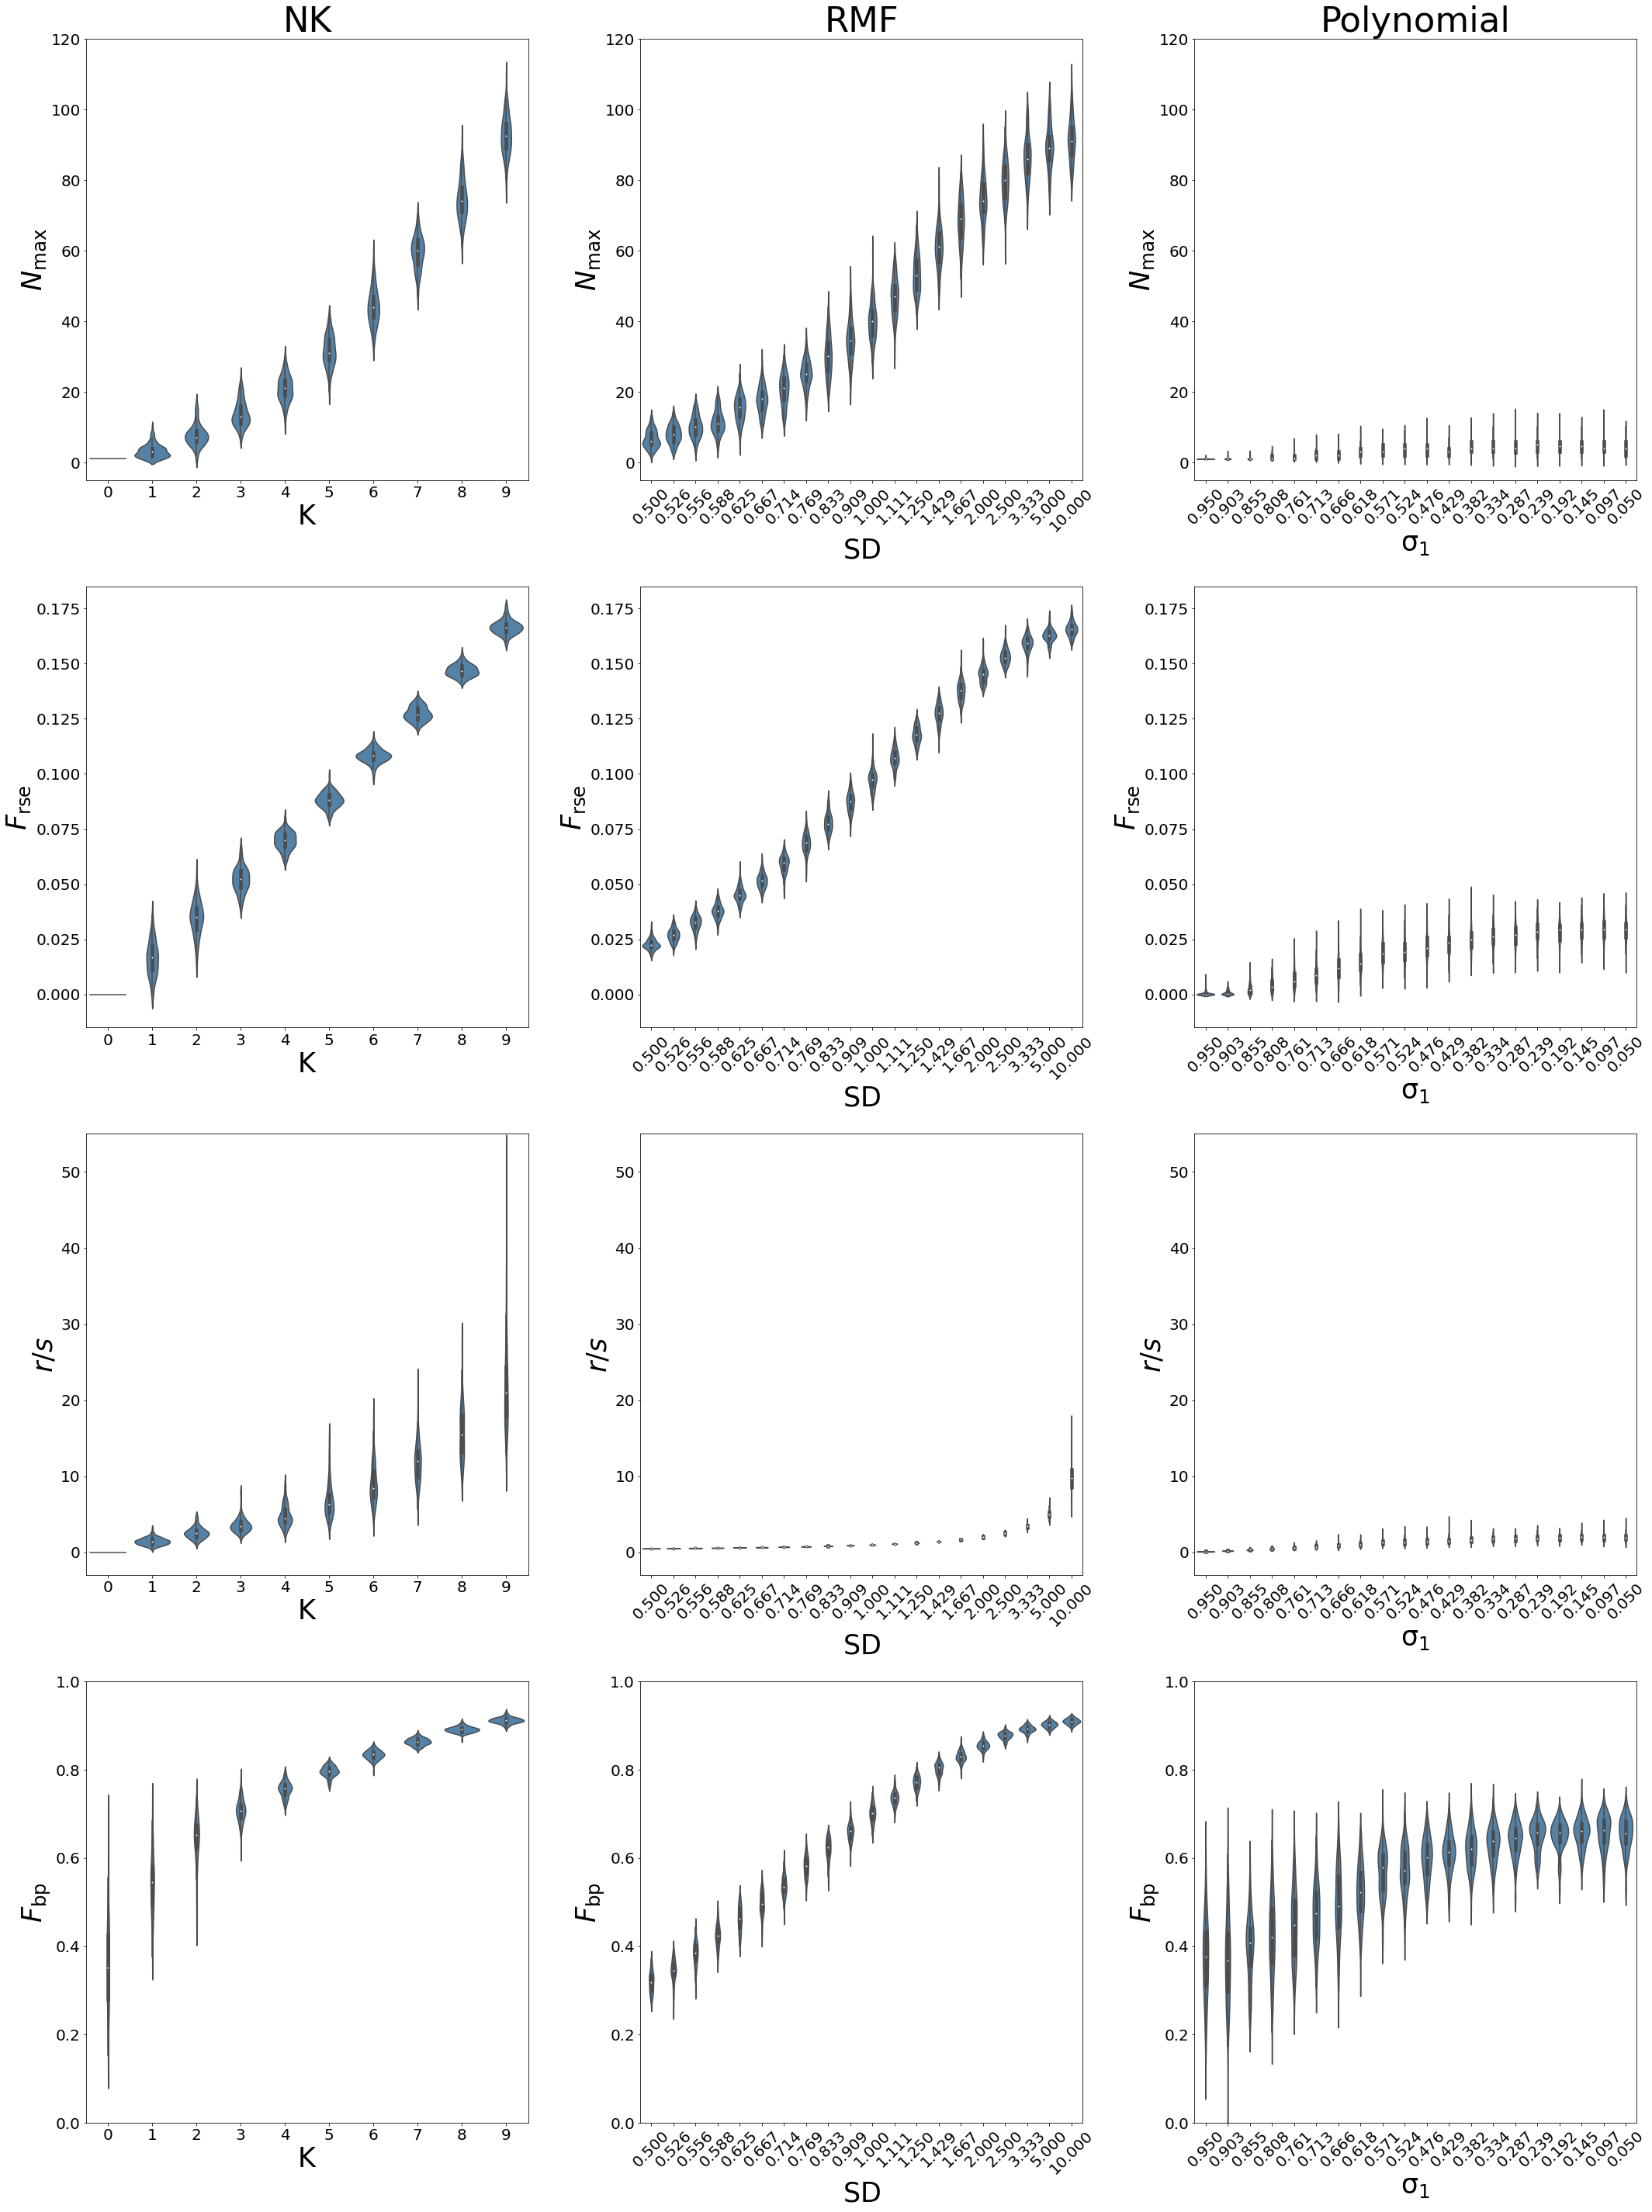

In [11]:
fig,axes = plt.subplots(4,3,figsize=[30,40])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
for i,model in enumerate(model_list):
    for j,metric in enumerate(metric_list):
        ax = axes[j,i]
        plot_df = df_dict[model][metric]
        if j == 3:
            sns.violinplot(x=plot_df.iloc[:,0], y=1-plot_df.iloc[:,1], data=plot_df, color='steelblue',ax=ax)
        else:
            sns.violinplot(x=plot_df.iloc[:,0], y=plot_df.iloc[:,1], data=plot_df, color='steelblue',ax=ax)
        ax.set_xlabel(xlabel_list[i],fontsize=35)
        ax.set_ylabel(ruggedness_measure_dict[metric],fontsize=35)
        matplotlib.rcParams.update({'font.size': 20})
        if i >= 1:
            ax.tick_params(axis='x',labelrotation=45)
            ax.set_xticklabels(['{:.3f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
        if i == 2:
            ax.set_xlim(19.5,-0.5)
        if j == 0:
            ax.set_title(model,fontsize=45)
            ax.set_ylim(-5,120)
            #ax.text(text_y_pos[model][0],text_y_pos[model][1],model,rotation='vertical',fontsize=40)
        if j == 1:
            ax.set_ylim(-0.015,0.185)
        if j == 2:
            ax.set_ylim(-3,55)
        if j == 3:
            ax.set_ylim(0,1)
        
plt.tight_layout()